<a href="https://colab.research.google.com/github/ivyyyyyliu/Project-2-/blob/main/Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LiPing Liu

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [81]:
file1 = '/content/drive/MyDrive/07 Week 7: Classification/Project 2/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- Deleted duplicate rows.

In [83]:
df.duplicated().sum()
#checking if there is any duplicate 

0

- Identified and addressed missing values.

In [84]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [85]:
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)
df.isna().sum()
#cause the missing values are in the a numeric column and float so I decided to fill with average/mean of bmi.

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [86]:
df['gender'].value_counts()
#there is one 'other', I would drop this one cause it does not really help to understand the data.

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [87]:
df[df['gender'] == 'Other']
#in row3116

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [88]:
df=df.drop(index=[3116])

In [89]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [90]:
df['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [91]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [92]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [93]:
df['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

- Produced univariate visuals for the target and all features.

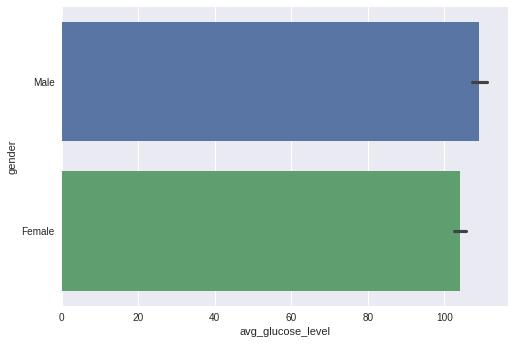

In [94]:
sns.barplot(data=df, y='gender', x='avg_glucose_level');

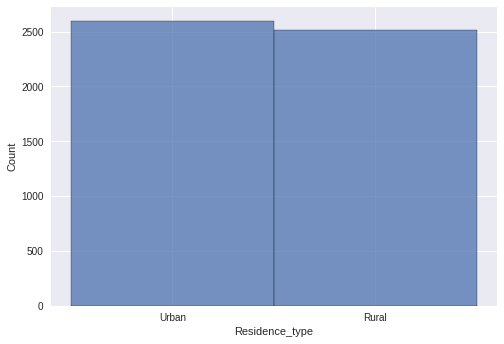

In [95]:
# Use Histogram to look at dictribution of Literacy Rates
sns.histplot(data=df, x='Residence_type');

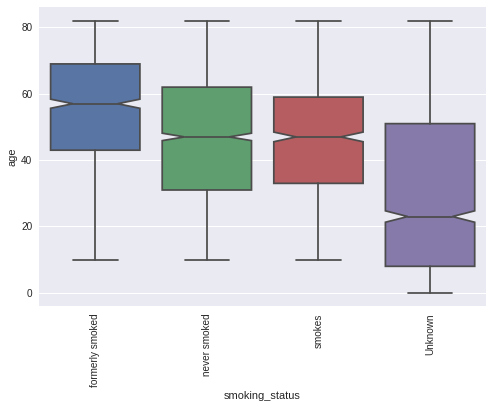

In [96]:
#boxplot with seaborn
sns.boxplot(data=df, y='age', x='smoking_status', notch=True);
plt.xticks(rotation = 90);

- Identified outliers.

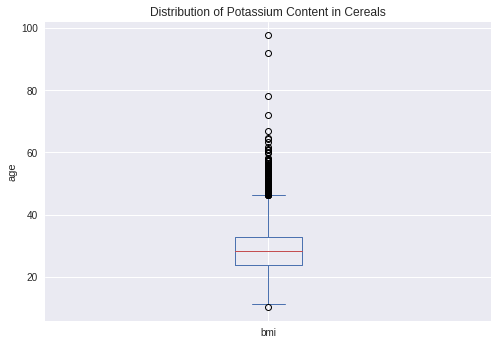

In [97]:
df['bmi'].plot(kind='box')
plt.title('Distribution of Potassium Content in Cereals')
plt.ylabel('age');
#plt.show()

correlations

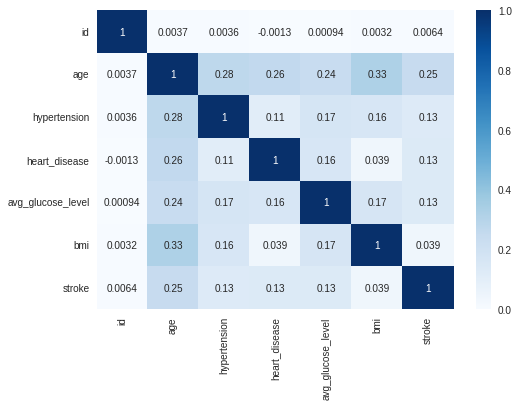

In [98]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True);

The only higher correlation I can found here is between Age and BMI. It is highest of all.  

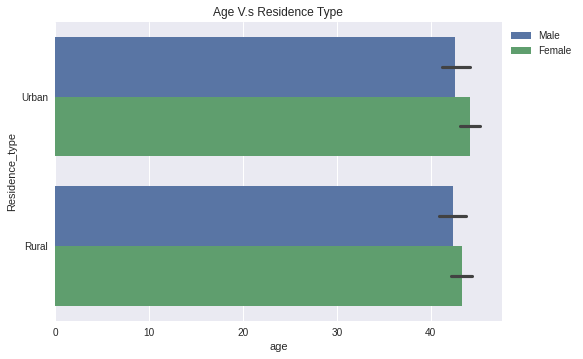

In [99]:
sns.barplot(data = df, x = 'age', y = 'Residence_type', hue = 'gender')
plt.title('Age V.s Residence Type')
plt.legend(bbox_to_anchor=(1,1));

In this Data, Female are generally olrder than male. In Urban and Rural, they have more female more than male.

In [100]:
smoke_bmi = df.groupby('smoking_status')['bmi'].mean()
smoke_bmi

smoking_status
Unknown            25.793839
formerly smoked    30.655968
never smoked       29.959529
smokes             30.434789
Name: bmi, dtype: float64

In [101]:
counts = df.groupby(['smoking_status'])['bmi'].nunique()
counts

smoking_status
Unknown            327
formerly smoked    271
never smoked       335
smokes             260
Name: bmi, dtype: int64

In [102]:
smoking = list(counts.index)
smoking

['Unknown', 'formerly smoked', 'never smoked', 'smokes']

Text(0.5, 1.0, 'Average Salaries by International Currency')

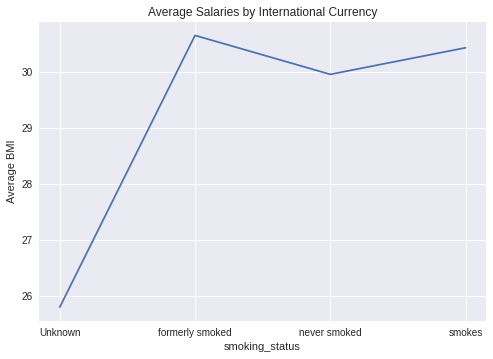

In [103]:
plt.style.use('seaborn')
plt.plot(smoking, smoke_bmi);
plt.xlabel('smoking_status')
plt.ylabel('Average BMI');
plt.title('Average Salaries by International Currency')

people who formerly smoked and smokes has higher BMI than people who nenver smoked. 

## Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model).

In [104]:
#make a copy of the data 
df2 = df.copy()

In [105]:
y = df2['stroke']
X = df2.drop(columns = 'stroke')


In [106]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [107]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [108]:
## Instantiate OneHotEncoder and StandardScaler
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()
## Create tuples of (transformer, selector) for the ColumnTransformer
cat_tuple = (ohe, cat_selector)
num_tuple = (scaler, num_selector)


In [109]:
preprocessor = make_column_transformer(num_tuple, cat_tuple)

In [110]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f821b02ae80>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f821b02a250>)])

In [111]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [112]:
dec_tree = DecisionTreeClassifier(random_state = 42)

In [113]:
dec_pipe = make_pipeline(preprocessor, dec_tree)

In [114]:
dec_pipe.fit(X_train,y_train)
dec_pipe.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [115]:
train_score = dec_pipe.score(X_train, y_train)
test_score = dec_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.8982785602503912


In [116]:
param_grid = {'max_depth': [4,6,8],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}
 
pd.DataFrame(param_grid)

,max_depth,min_samples_leaf,min_samples_split
0,4,3,2
1,6,15,10
2,8,20,100


In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
dt_grid_search = GridSearchCV(dec_tree, param_grid)
dt_grid_search.fit(X_train_processed, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8],
                         'min_samples_leaf': [3, 15, 20],
                         'min_samples_split': [2, 10, 100]})

In [119]:
dt_grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 2}

In [120]:
dec_tree2 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=15,min_samples_split=2)

In [121]:
dec_pipe2 = make_pipeline(preprocessor, dec_tree2)
dec_pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f821b02ae80>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f821b02a250>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=15))])

In [122]:
train_score = dec_pipe2.score(X_train, y_train)
test_score = dec_pipe2.score(X_test, y_test)
print(train_score)
print(test_score)

0.9558861915948839
0.9374021909233177


In [123]:
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, knn)

In [124]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f821b02ae80>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f821b02a250>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [125]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.9366197183098591

In [126]:
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10]}
knn_grid_search = GridSearchCV(knn, param_grid)

In [127]:
knn_grid_search.fit(X_train_processed, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]})

In [128]:
knn_grid_search.best_params_

{'n_neighbors': 6}

In [129]:
knn2 = KNeighborsClassifier(n_neighbors=6)
knn_pipe2 = make_pipeline(preprocessor, knn2)

In [130]:
knn_pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f821b02ae80>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f821b02a250>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=6))])

In [131]:
acc_score = knn_pipe2.score(X_test, y_test)
acc_score

0.9374021909233177

The tuned dec tree model and tuned Knn model both have highest accuracy score with 93.74 accuracy on the 
test set.


## Perform PCA or another feature engineering technique on your dataset to see how this impacts your results. (We encourage you to try multiple techniques depending on your data!).

In [138]:
df3=df.copy()
df3['Disease Score'] = df3['hypertension'] + df3['heart_disease'] 
df3 = df3.drop(['hypertension', 'heart_disease'], axis=1)
df3.head()

,id,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Disease Score
0,9046,Male,67.0,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1
1,51676,Female,61.0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0
2,31112,Male,80.0,Yes,Private,Rural,105.92,32.500000,never smoked,1,1
3,60182,Female,49.0,Yes,Private,Urban,171.23,34.400000,smokes,1,0
4,1665,Female,79.0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1


In [139]:
y = df3['stroke']
X = df3.drop(columns = 'stroke')

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [142]:
## Instantiate OneHotEncoder and StandardScaler
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()
## Create tuples of (transformer, selector) for the ColumnTransformer
cat_tuple = (ohe, cat_selector)
num_tuple = (scaler, num_selector)

In [143]:
preprocessor = make_column_transformer(num_tuple, cat_tuple)

In [144]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f821af50220>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f821af505e0>)])

In [145]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [146]:
dec_tree = DecisionTreeClassifier(random_state = 42)

In [147]:
dec_pipe = make_pipeline(preprocessor, dec_tree)

In [149]:
dec_pipe.fit(X_train,y_train)
dec_pipe.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [150]:
train_score = dec_pipe.score(X_train, y_train)
test_score = dec_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.8912363067292645


the score is the same as before.

## Choose your "production" model and justify this decision.

I  would chose KNN as the final model,even though they both have same score after the tuned but  before the tuned it has better score than the decision tree.